# **Aprendizaje supervisado**
# SL06. Regresion Logística

El algoritmo de **regresión logística** es uno de los más utilizados en aprendizaje automático. Siendo su principal aplicación los problemas de clasificación binaria. Es un algoritmo simple en el que se pueden interpretar fácilmente los resultados obtenidos e identificar por qué se obtiene un resultado u otro. A pesar de su simplicidad funciona muy bien en muchas aplicaciones y se utiliza como referencia de rendimiento.

La regresión logística es una técnica de aprendizaje automático que proviene del campo de la estadística. A pesar de su nombre no es un algoritmo para aplicar en problemas de regresión, en los que se busca un valor continuo, sino que es un método para problemas de clasificación, en los que se obtienen un valor binario entre 0 y 1. Por ejemplo, un problema de clasificación es identificar si una operación dada es fraudulenta o no. Asociándole una etiqueta “fraude” a unos registros y “no fraude” a otros. Simplificando mucho es identificar si al realizar una afirmación sobre registro esta es cierta o no.

Con la regresión logística se mide la relación entre la variable dependiente, la afirmación que se desea predecir, con una o más variables independientes, el conjunto de características disponibles para el modelo. Para ello utiliza una función logística que determina la probabilidad de la variable dependiente. Como se ha comentado anteriormente, lo que se busca en estos problemas es una clasificación, por lo que la probabilidad se ha de traducir en valores binarios. Para lo que se utiliza un valor umbral. Los valores de probabilidad por encima del valor umbral la afirmación es cierta y por debajo es falsa. Generalmente este valor es 0,5, aunque se puede aumentar o reducir para gestionar el número de falsos positivos o falsos negativos.

En términos generales la regresión logísticas usa un **enfoque probabilístico**.

$h_{\theta}(x)$ debería ser $p(y=1/x;\theta)$.

Modelo de regresión logística:

$$h_{\theta}(x)=g(\theta^{T}x)$$
$$g(z) = \frac{1}{1+e^{-z}}$$
$$h_{\theta}(x) = \frac{1}{1+e^{-\theta^{T}x}}$$

<img src='https://drive.google.com/uc?export=view&id=1MeNaOMGnQE1uBOLfJAR4b53d0v630mHR' width="400" align="center" style="margin-right: 20px">

$\theta^{T}x$ debería tener valores **negativos** grandes para instancias negativas y valores **positivos** grandes para instancias positivas.

Definir un umbral:

* Predecir $y=1$ si $h_{\theta}(x) 	\geq0.5$
* Predecir $y=0$ si $h_{\theta}(x) 	< 0.5$

<img src='https://drive.google.com/uc?export=view&id=1esyo1Y8jCivlo7Xwyeyd0CWiVnWO6Ftk' width="400" align="center" style="margin-right: 20px">

Para entender el funcionamiento de la regresión logística utilizaremos un ejemplo.

### Cargar el dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Data set cargado.

iris = load_iris()
x = iris.data
y = iris.target
# Transformelo a data frame para visualizarlo
df = pd.DataFrame(x,columns = iris.feature_names)
df['species_id'] = y
species_map = {0:'setosa',1:'versicolor',2:'virginica'}
df['species_name'] = df['species_id'].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## <font color='green'>Actividad 1</font>

Realice un analisis exploratorio con el objetivo de indentificar la factibilidad de construir un clsificador de especies. ¿Qué especie se ve fácilmente separable?

### Estadistica descriptiva y visualizaciones

Hágalo para todas las especies, observe las diferencias.

```
setosa_mask = df['species_name'] == 'setosa'
df[setosa_mask].describe()
```



In [ ]:
#Solución
setosa_mask = df['species_name'] == 'setosa'
df[setosa_mask].describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id
count,50.00000,50.000000,50.000000,50.000000,50.0
mean,5.00600,3.428000,1.462000,0.246000,0.0
std,0.35249,0.379064,0.173664,0.105386,0.0
min,4.30000,2.300000,1.000000,0.100000,0.0
25%,4.80000,3.200000,1.400000,0.200000,0.0
50%,5.00000,3.400000,1.500000,0.200000,0.0
75%,5.20000,3.675000,1.575000,0.300000,0.0
max,5.80000,4.400000,1.900000,0.600000,0.0


### Realice un pair plot

Utilice lo visto en cursos anteriores.

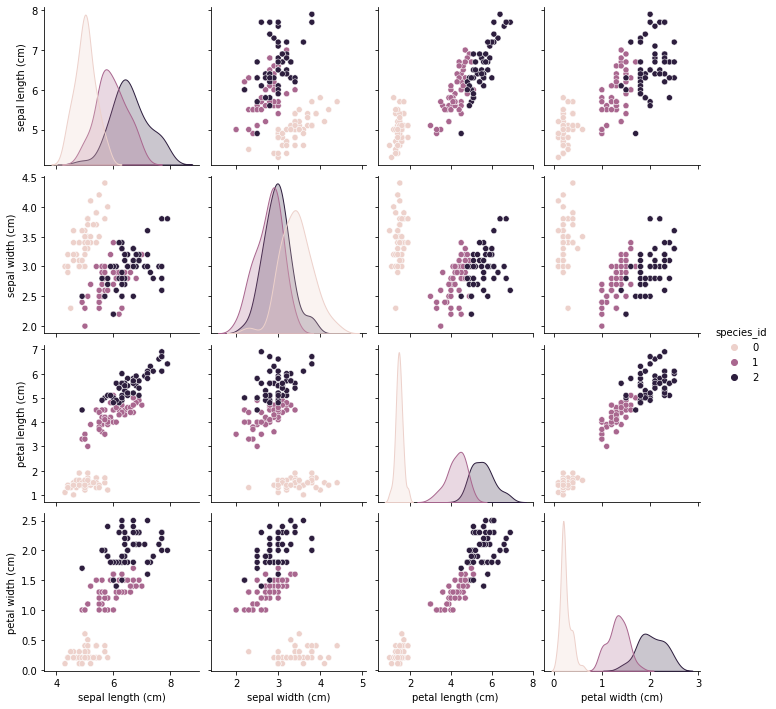

In [ ]:
import seaborn as sns
sns.pairplot(data=df, hue='species_id')
plt.show()

- Existe una clase que es fácilmente separada de las otras dos.
- Se puede realizar una regresión logística para separar la primera clase (rosa claro) de las otras dos y luego otra regresión para separa las otras dos.

<font color='green'>Fin Actividad 1</font>

### Adaptando el data set a un problema binario.

Como se vió en las visualizaciones anteriores. Vamos a reconocer setosa de las otras especies. Para esto debemos adaptar nuestra variable de salida.

```
y1 = np.where(y==2, 1, y) 
print(y1)
```



In [ ]:
y1 = np.where(y==2, 1, y) 
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


### Separar conjunto de entrenamiento y validación

Utilice el mismo método que en regresión lineal para realizar split y LogisticRegression para la regresión logistica.





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.33, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

### Verificación

```
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,len(y_test)):
  print (y_test[i],probabilidades[i])

```



In [ ]:
probabilidades = log_reg.predict_proba(x_test)
for i in range(0,10):
  print (y_test[i],probabilidades[i])

1 [0.00523303 0.99476697]
0 [0.9516606 0.0483394]
1 [7.76219172e-06 9.99992238e-01]
1 [0.00694647 0.99305353]
1 [0.00265771 0.99734229]
0 [0.95727982 0.04272018]
1 [0.0634737 0.9365263]
1 [7.72437507e-04 9.99227562e-01]
1 [0.00358562 0.99641438]
1 [0.02949532 0.97050468]


## <font color='blue'>**¿Cómo funciona la regresión logística?**</font>

Dado un conjunto de entradas X, queremos asignarlas a una de dos categorías posibles (0 o 1). La regresión logística modela la probabilidad de que cada entrada pertenezca a una categoría particular.

### Contruya una función sigmoidea


In [ ]:
# Función sigmoidea.

def sigmoidea(z):
    return 1 / (1 + np.exp(-z))

### ¿Como medimos que tan buenos esta siendo nuestro modelo?
### La función de perdida. Entropía cruzada

La entropía de una variable aleatoria X, es el nivel de incertidumbre inherente a las posibles variables de resultado.

Sea $p(x)$ una distribución de probabilidad de una variable aleatoria $X$. Entonces la **entropía** se define por:

$$ H(X) =- \sum_x p(x) log(p(x))$$ para el caso discreto.


![Log](https://drive.google.com/uc?export=view&id=1RW2paVAoK7kmrGl8C-Y5Zim6YpeLtVsF) 


Veamos un ejemplo concreto:

![Entropia](https://drive.google.com/uc?export=view&id=13pUhML_hNg6sdHG9h5lToPu1Mxx9uPuB) 


Calcule la entropía para cada uno de los contenedores.

1. $ -[\frac{26}{30}log_2(\frac{26}{30}) + \frac{4}{30}log_2(\frac{4}{30}) ]$ = 0.5665

2. =  0.9968

3. =  0

Nuestra entropía esta midiendo un desorden (Termodinamica, Mecánica estadística, o la cantidad de ruido que contiene una señal (Teoria de la información).

Entropia Cruzada: 

También se llama pérdida logarítmica o pérdida logística. Cada probabilidad de clase predicha se compara con la salida deseada de clase real 0 o 1 y se calcula una puntuación/pérdida que penaliza la probabilidad en función de qué tan lejos está del valor esperado real. La penalización es de naturaleza logarítmica, lo que genera una puntuación grande para las diferencias grandes cercanas a 1 y una puntuación pequeña para las diferencias pequeñas que tienden a 0.

![EntropiaCruzada](https://drive.google.com/uc?export=view&id=1VlvM3dWPbapiJFUs_cVe2gkAlRHCrEGz) 


$$L{CE} = - \sum_{i=1}^n t_ilog(p_i)$$, para $n$ clases. 

Donde $t_i$ es el truth label y $p_i$ la probabilidad obtenida de la función softmax para la $i^{th}$ clase.

$$ \sigma(z)_j = \frac{e^{z_j}}{\sum_{k=1}^K e^{z_k}}$$

En el caso del ejemplo tenemos:

$L_{CE} = -1log_2(0.936)+0+0+0$ = 0.095

```
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
```



In [ ]:
# Función de loss

def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

### El gradiente

1. **¿Que es el gradiente?:** El gradiente es un vector que es tangente de una función y apunta en la dirección de mayor aumento de esta función. El gradiente es cero en un máximo o mínimo local porque no hay una única dirección de aumento. En matemáticas, el gradiente se define como una derivada parcial para cada variable de entrada de la función.

$$ \nabla f(x,y) = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$$

2. **¿Que es el gradiente descendente?:**  Como el gradiente es un vector que apunta al mayor aumento de una función, el gradiente negativo es un vector que apunta al mayor descenso de una función. Por lo tanto, podemos minimizar una función moviéndonos iterativamente **un poco** en la dirección del gradiente negativo. Esa es la lógica del descenso en gradiente.

Dado un punto de partida $(X_1^{0}, ...,X_n^{0})$
$$ x_1^{(i+1)} = x_1^{(i)} - \alpha \frac{\partial f}{\partial x_1}(x^{(i)})$$

$$ x_n^{(i+1)} = x_n^{(i)} - \alpha \frac{\partial f}{\partial x_n}(x^{(i)})$$


![GradientDescent](https://drive.google.com/uc?export=view&id=15VIlre07RyAx_VsUFVtS7Hyt1Nk5w3WN) 

Un parámetro importante en el descenso de gradientes es la tasa de aprendizaje (LearningRate, $\alpha$), que determina el tamaño de cada paso. Cuando la tasa de aprendizaje es demasiado grande, el descenso en pendiente puede saltar a través del valle y terminar en el otro lado. Esto conducirá a la divergencia de la función de costos. Por otro lado, cuando la tasa de aprendizaje es demasiado pequeña, el algoritmo tardará mucho en converger. Por lo tanto, se necesita una velocidad de aprendizaje adecuada antes de que comience el descenso de gradiente.


![Learningrate](https://drive.google.com/uc?export=view&id=1-EPuN5D59Phhhk-FKCfzz3yqk2mbsC39)  


La normalización juega un papel importante en Gradient Descent. Si las características no están normalizadas, las características a gran escala dominarán la actualización, por lo que el algoritmo generará una ruta de aprendizaje en zigzag. Se necesitan muchos pasos innecesarios y más tiempo para llegar al mínimo. Una vez normalizadas todas las características, la función de coste adquiere una forma más esférica. El algoritmo Gradient Descent va directo al mínimo. Una forma de realizar la normalización es menos la media y dividir por la desviación estándar. También puede aplicar la función Scaler de Scikit-Learn directamente.







## Las ecuaciones:

$$h_{\theta}(x) = \sigma(\theta^Tx)$$ 
Donde $$\sigma = \frac{1}{1+ e^z}$$
Además sea $$z(\theta) = \theta^Tx $$ 

$$L(y,\hat{y}) = -[y \log (\hat{y}) + (1-y) \log{(1-\hat{y})}] $$
$$L(y,\hat{y}) = -[y \log (\sigma(z(\theta))) + (1-y) \log{(1-\sigma(z(\theta)))}] $$

$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = -[\frac{\partial  y\log (\sigma(z(\theta))) }{\partial \theta_j} +  \frac{\partial (1-y) \log{(1-\sigma(z(\theta)))}}{\partial \theta_j}] $$


$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = -[\frac{y}{\sigma(z(\theta))}\frac{\partial \sigma(z(\theta))}{\partial \theta_j} + \frac{1-y}{1-\sigma(z(\theta_j))}\frac{\partial \sigma(1 - z(\theta))}{\partial \theta_j}] $$

$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = [\frac{1-y}{1-\sigma(z(\theta))} -\frac{y}{\sigma(z(\theta))}] \frac{\partial \sigma(z(\theta))}{\partial \theta_j}$$

Apliquemos la derivada sobre la sigmoidea $\sigma(z)'= \sigma(z)(1-\sigma(z))$

$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = [\frac{\sigma(z(\theta)) - y}{\sigma(z(\theta)) [1 - \sigma(z(\theta))]} ] \sigma(z(\theta)) (1-\sigma(z(\theta)))x_j$$

$$\frac{\partial L(y,\hat{y})}{\partial \theta_j} = [\sigma(z(\theta)) - y] x_j$$








```

gradiente = np.dot(X.T, (h - y)) / y.shape[0]
lr = 0.01
theta -= lr * gradient
```

```
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))
```

```
def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
```





## <font color='green'>Actividad 2</font>

Construya la regresión logistica.

Defina una funcion fit(X,y):

1. Al dataset $X$, se le agrega un intercepto, utilizando la función *add_intercept*.
2. Definimos un array theta que contenfa los pesos de la regresión logistica, los puede iniciar en 0 o aleatorios.
3. Itere los siguientes pasos una cantidad determinada de veces, por ejemplo 20.000

    a.  Haga un forward (multiplique el vector de entrada con theta, utilice la función dot)

    b. Aplique la función gradiente.

    c. Aplique el learning rate y actualice theta.
4. Prediga el conjunto de test con la función predict_probs
5. Compare theta y los resultados con la función utilizada en sklearn.

In [ ]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X = iris.data
y = iris.target

In [ ]:
  def sigmoidea(z):
    return 1 / (1 + np.exp(-z))

  def predict_probs(X, theta):
    return sigmoidea(np.dot(X, theta))
  
  def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y1 = np.where(y==2, 1, y) 
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
(X.shape[0], 1)

(150, 1)

In [ ]:
y.shape

(150,)

In [ ]:
X.shape

(150, 4)

In [ ]:
h.shape

(150,)

In [ ]:
# (h - y1)
np.dot(X_with_intercept.T, (h - y1)) / y.shape[0]

array([-0.16666667, -1.253     , -0.386     , -1.39166667, -0.51766667])

In [ ]:
X_with_intercept = add_intercept(X)
theta = np.zeros(X_with_intercept.shape[1])

i = 0
h = predict_probs(X_with_intercept, theta)
h

gradiente = np.dot(X_with_intercept.T, (h - y)) / y.shape[0]

lr = 0.01
theta -= lr * gradiente

In [ ]:
theta

array([0.005     , 0.03449   , 0.01377333, 0.03242333, 0.01193   ])

In [ ]:
#Solución

# Defina una funcion fit(X,y):
def fit(X,y):

  def sigmoidea(z):
    return 1 / (1 + np.exp(-z))

  def predict_probs(X, theta):
    return sigmoidea(np.dot(X, theta))
  
  def add_intercept(X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

  #Al dataset  X , se le agrega un intercepto, utilizando la función add_intercept.
  X_with_intercept = add_intercept(X)

  #Definimos un array theta que contenfa los pesos de la regresión logistica, los puede iniciar en 0 o aleatorios.
  theta = np.zeros(X_with_intercept.shape[1])

  #Itere los siguientes pasos una cantidad determinada de veces, por ejemplo 20.000
  #vamos bajando en nuestra "función de costo"
  for i in range(0,20000):
    #a. Haga un forward (multiplique el vector de entrada con theta, utilice la función dot) - se obtiene h
    h = predict_probs(X_with_intercept, theta)

    #b. Aplique la función gradiente.
    #(h - y) = es el valor estimado menos el valor real.
    gradiente = np.dot(X_with_intercept.T, (h - y)) / y.shape[0]

    #c. Aplique el learning rate y actualice theta.
    lr = 0.01
    theta -= lr * gradiente

  #Prediga el conjunto de test con la función predict_probs
  return theta, h


In [ ]:
theta, h = fit(X,y1)

In [ ]:
h

array([2.58043295e-03, 8.27620363e-03, 4.44530897e-03, 1.11354206e-02,
       2.22375786e-03, 3.33234833e-03, 4.99255588e-03, 4.68194884e-03,
       1.37595468e-02, 8.02342749e-03, 1.96113376e-03, 7.31419149e-03,
       7.58639651e-03, 3.86748277e-03, 3.07519388e-04, 5.06739741e-04,
       9.02560502e-04, 2.99236251e-03, 2.95370993e-03, 2.21281544e-03,
       7.04605422e-03, 3.16370454e-03, 7.67366929e-04, 1.61372128e-02,
       1.92817929e-02, 1.48830040e-02, 8.70467935e-03, 3.36534928e-03,
       2.99414454e-03, 1.17744752e-02, 1.36420736e-02, 4.93972236e-03,
       8.25376040e-04, 4.66500283e-04, 9.29615572e-03, 2.67534770e-03,
       1.46043892e-03, 2.03737517e-03, 8.08812288e-03, 4.40700148e-03,
       2.29423940e-03, 3.72504921e-02, 5.32998660e-03, 9.48958108e-03,
       9.43243779e-03, 1.01835580e-02, 2.64447297e-03, 6.53844094e-03,
       2.08380585e-03, 4.16612762e-03, 9.97752838e-01, 9.97413391e-01,
       9.99230793e-01, 9.98435098e-01, 9.99142669e-01, 9.99016100e-01,
      

In [ ]:
theta, h = fit(x_test, y_test)

In [ ]:
h

array([9.99030196e-01, 2.94208881e-03, 9.99999713e-01, 9.98641643e-01,
       9.99202102e-01, 4.92684518e-03, 9.75031920e-01, 9.99842682e-01,
       9.99638576e-01, 9.91565858e-01, 9.99762265e-01, 7.48688177e-03,
       1.48077156e-03, 7.88924856e-03, 2.23257785e-03, 9.98310213e-01,
       9.99987563e-01, 9.94243513e-01, 9.98757326e-01, 9.99985317e-01,
       1.15363475e-02, 9.99684387e-01, 8.60865643e-03, 9.99982951e-01,
       9.99970033e-01, 9.99917650e-01, 9.99990915e-01, 9.99985903e-01,
       1.00689955e-02, 1.33266306e-02, 7.95863026e-04, 5.23082054e-04,
       9.95004856e-01, 7.21557247e-03, 5.33239350e-03, 9.99920668e-01,
       9.96790602e-01, 3.35944605e-03, 2.24230011e-03, 8.39834557e-04,
       9.99935638e-01, 9.96720397e-01, 9.98346442e-01, 9.28910938e-04,
       1.97200952e-03, 9.90335964e-01, 9.99805343e-01, 9.99931698e-01,
       9.96171088e-01, 9.99983950e-01])

In [ ]:
x_test
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1])

In [ ]:
for i in range(0,10):
  print (y_test[i], h[i], 1-h[i])

1 0.9990301958117132 0.0009698041882868491
0 0.0029420888071594953 0.9970579111928405
1 0.9999997126557141 2.8734428592080974e-07
1 0.9986416426168383 0.0013583573831617013
1 0.9992021019641155 0.0007978980358844812
0 0.004926845178791115 0.9950731548212088
1 0.9750319199967933 0.024968080003206716
1 0.9998426824771907 0.00015731752280934153
1 0.9996385761072325 0.0003614238927674984
1 0.9915658575348614 0.008434142465138628


<font color='green'>Fin Actividad 2</font>